In [7]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.table import Table
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import ScalarFormatter
import cmasher as cmr

import matplotlib.patheffects as PathEffects
plt.rcParams['figure.dpi'] = 300


16231
14079
223


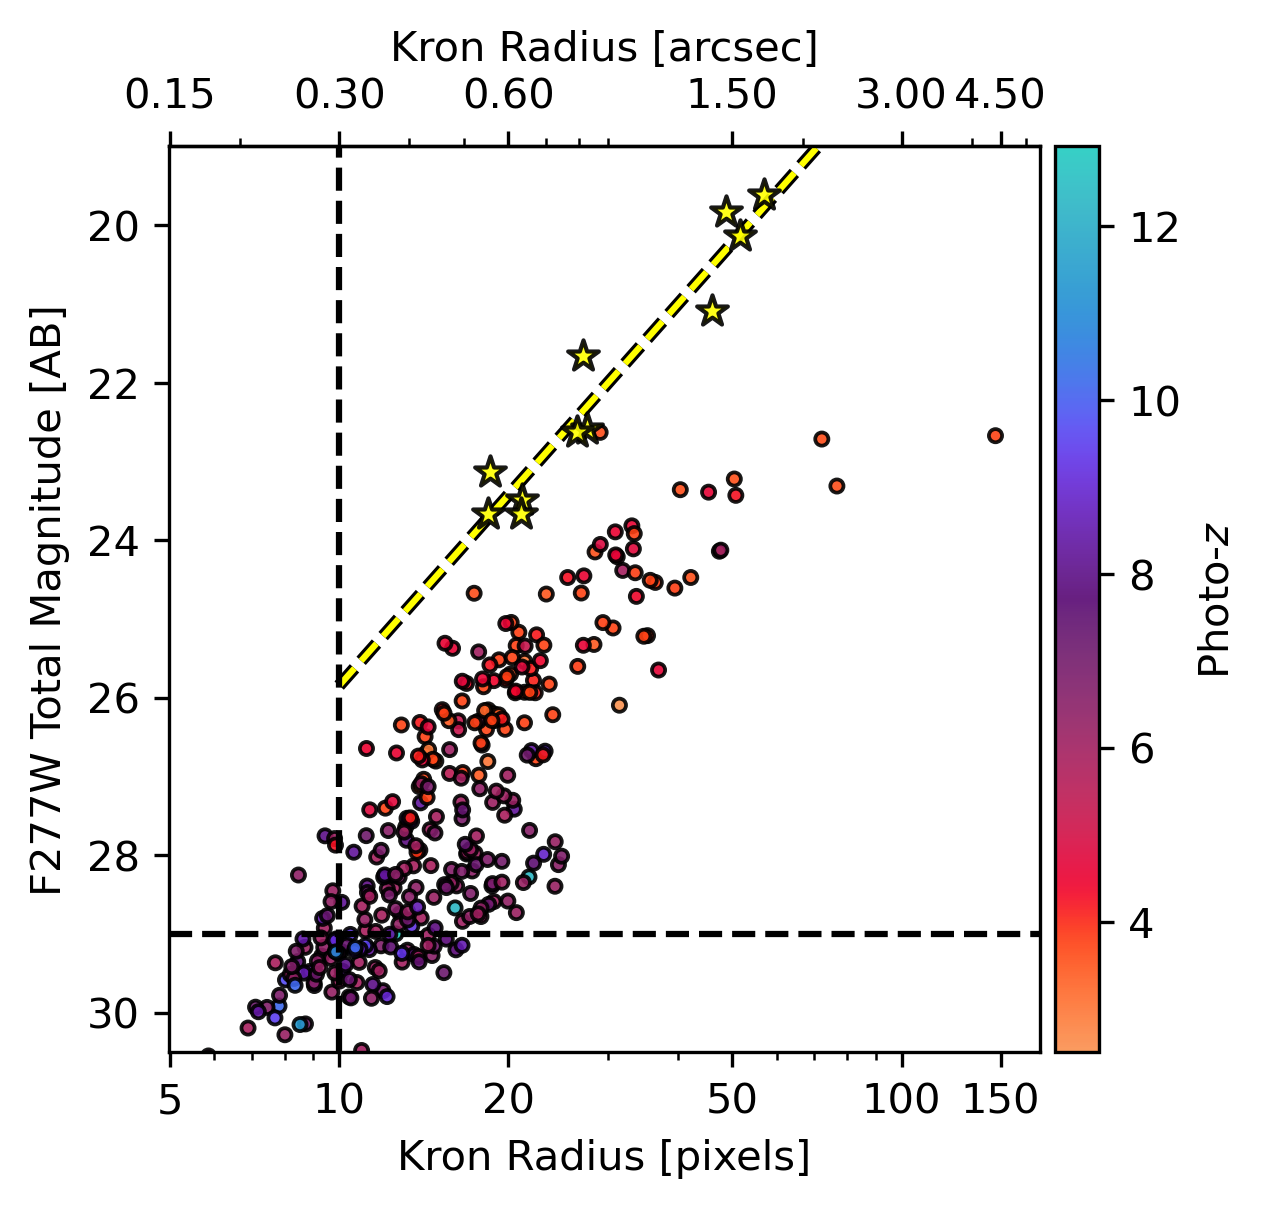

In [10]:
path_cat = '/raid/scratch/work/austind/GALFIND_WORK/Catalogues/v11/ACS_WFC+NIRCam/JOF_psfmatched/JOF_psfmatched_MASTER_Sel-F277W+F356W+F444W_v11_total.fits'

cat = Table.read(path_cat)
print(len(cat))
masks = [col for col in cat.colnames if 'unmasked_' in col]
for mask in masks:
    cat = cat[cat[mask] == True]
print(len(cat))

# Define the selection criteria
cat = cat[cat['EPOCHS'] == True]
selection = lambda c: (c['MAG_APER_F277W_TOTAL'] < 29) & (c['kron_radius_F277W+F356W+F444W'] > 10) & (c['EPOCHS'] == True) 



# Apply the selection

mask = selection(cat)
cat_selected = cat[mask]
print(len(cat_selected))
color_by = 'zbest_fsps_larson_zfree'


fig, ax = plt.subplots(1, 1, figsize=(4, 4), facecolor='white')
cax = make_axes_locatable(ax).append_axes('right', size='5%', pad=0.05)
# Add top axis
ax.set_xscale('log')

ax_top = ax.secondary_xaxis('top', functions = (lambda x: x*0.03, lambda x: x/0.03))
ax_top.set_xlabel('Kron Radius [arcsec]')
ax.set_xlabel('Kron Radius [pixels]')
ax.set_ylabel(r'F277W Total Magnitude [AB]')

points = ax.scatter(cat['kron_radius_F277W+F356W+F444W'], cat['MAG_APER_F277W_TOTAL'], s=10, c = cat[color_by], cmap='cmr.guppy', alpha=0.9, edgecolor='black', linewidth=0.9)
ax.set_ylim(30.5, 19)
ax_top.set_xscale('log')
y = lambda x: -8.03979 * np.log10(x) + 33.88689 # LOBF for stars
x = np.linspace(10, 150, 100)

ax.plot(x, y(x), c = 'yellow', zorder=1, path_effects=[PathEffects.withStroke(linewidth=3, foreground='black')], linestyle = 'dashed')
fig.colorbar(points, cax=cax, label='Photo-$z$')
ax.xaxis.set_major_formatter(ScalarFormatter())
ax.set_xticks([5, 10, 20, 50, 100, 150])
ax_top.xaxis.set_major_formatter(ScalarFormatter())
ax_top.set_xticks([0.15, 0.3, 0.6, 1.5, 3, 4.5])
ax.axvline(10, color='black', linestyle='--')
ax.axhline(29, color='black', linestyle='--')


stars = Table.read('/nvme/scratch/work/tharvey/catalogs/JOF_psfmatched_PSF_STARS.fits')
ax.scatter(stars['kron_radius_F277W+F356W+F444W_1a'], stars['MAG_APER_F277W_TOTAL'], s=60, color='yellow', alpha=0.9, marker = '*', edgecolor = 'black', linewidth = 1)
plt.savefig('/nvme/scratch/work/tharvey/resolved_sedfitting/plots/kron_radius_vs_mag.png', dpi=300, bbox_inches='tight')

plt.show()

In [29]:
import matplotlib
print (matplotlib.__version__)

3.8.4
